<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220725.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [48]:
import pandas as pd 
import numpy as np 
import os 
from datetime import datetime, date, time, timezone, timedelta
from functools import reduce 
from collections import ChainMap, defaultdict, Counter

import plotnine as gg
from plotnine import ggplot, aes

# customer analysis

In [2]:
os.listdir()

['.config',
 'listings.csv',
 'rfm_test.csv',
 '.Rhistory',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'sample_submission.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'retail_data_transactions.csv',
 'retail_data_response.csv',
 'items.csv',
 'sales_train.csv',
 'shops.csv',
 'item_categories.csv',
 'sample_data']

In [4]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
import re

In [25]:
df.columns = ['_'.join([a.lower() for a in re.split(r'(?=[A-Z])', x[0].lower()+x[1:])]) for x in df.columns ]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_i_d,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [28]:
df = df[(~df.invoice_no.astype(str).str.contains('C'))&(df.country == 'United Kingdom')]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_i_d,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
df.invoice_date = pd.to_datetime(df.invoice_date)
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df.quantity * df.unit_price
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_i_d,country,date,month,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34


In [30]:
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_i_d', 'country', 'date', 'month', 'rev'],
      dtype='object')

In [32]:
df = df[['customer_i_d', 'date', 'month', 'rev']].rename(columns = {'customer_i_d':'id'})
df = df.groupby(['id','date','month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
1,12747.0,2010-12-05,2010-12-01,358.56
2,12747.0,2010-12-13,2010-12-01,347.71
3,12747.0,2011-01-20,2011-01-01,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [34]:
list_pu = df.groupby(['id','month'])['rev'].sum().reset_index().sort_values(['id', 'month'])
list_pu.head()

,id,month,rev
0,12346.0,2011-01-01,77183.60
1,12747.0,2010-12-01,706.27
2,12747.0,2011-01-01,303.04
3,12747.0,2011-03-01,310.78
4,12747.0,2011-05-01,771.31


In [37]:
list_npu = list_pu.groupby(['id']).first().reset_index()
list_npu.head()

,id,month,rev
0,12346.0,2011-01-01,77183.60
1,12747.0,2010-12-01,706.27
2,12748.0,2010-12-01,4228.13
3,12749.0,2011-05-01,859.10
4,12820.0,2011-01-01,170.46


In [55]:
list_mon = list_npu['month'].sort_values().unique()
list_mon

array(['2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [56]:
for mon in list_mon :  

  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['rev'].count().reset_index().rename(columns = {'rev':'pu'})
  temp = temp.assign(npu_month = mon,
                      num = temp['month'].rank(),
                      ratio = lambda x : round(x['pu']/x['pu'].max()*100,2)
                      )
  temp = temp.reindex(columns = ['npu_month', 'num', 'pu', 'ratio'])
    
  if mon == list_mon[0] :

    res = temp
  else : 

    res = pd.concat([res, temp], axis = 0)

res.npu_month = res.npu_month.astype(str)
res

,npu_month,num,pu,ratio
0,2010-12-01,1.0,815,100.00
1,2010-12-01,2.0,289,35.46
2,2010-12-01,3.0,263,32.27
3,2010-12-01,4.0,304,37.30
4,2010-12-01,5.0,293,35.95
5,2010-12-01,6.0,323,39.63
6,2010-12-01,7.0,291,35.71
7,2010-12-01,8.0,278,34.11
8,2010-12-01,9.0,289,35.46
9,2010-12-01,10.0,74,9.08


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


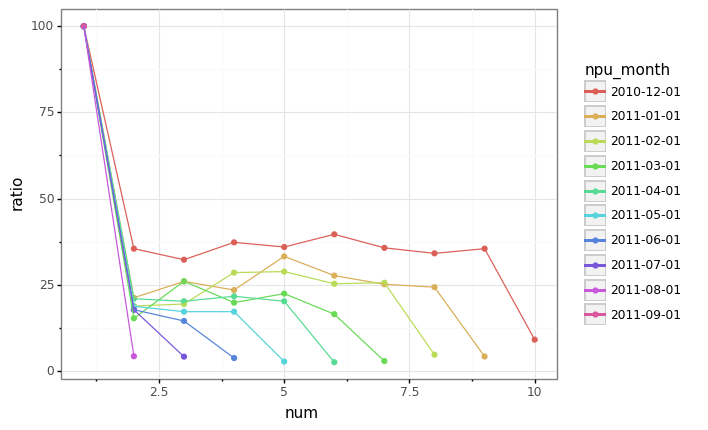

<ggplot: (8764211599349)>

In [58]:
(
    ggplot(res, aes('num', 'ratio', color = 'npu_month')) +
    gg.geom_point() +
    gg.geom_line() +
    gg.theme_bw()
)

# iterator

In [59]:
mat = [list('ABC'), list('DEF'), list('GHI')]
for r, rows in enumerate(mat) :
  for c, letters in enumerate(mat) :
    print(f'({r},{c})-{letters}')

(0,0)-['A', 'B', 'C']
(0,1)-['D', 'E', 'F']
(0,2)-['G', 'H', 'I']
(1,0)-['A', 'B', 'C']
(1,1)-['D', 'E', 'F']
(1,2)-['G', 'H', 'I']
(2,0)-['A', 'B', 'C']
(2,1)-['D', 'E', 'F']
(2,2)-['G', 'H', 'I']


In [60]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'age': 73,
  'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M'},
 {'age': 29,
  'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F'},
 {'age': 51,
  'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M'},
 {'age': 32,
  'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F'},
 {'age': 42, 'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F'}]

In [63]:
for key in list(users[0].keys()) :

  if key == list(users[0].keys())[0] :

    res = eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])')

  else :

    res = np.c_[res, eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])')]

res

array([['gregorythomas@gmail.com', 'Brett Holland', 'M', '73'],
       ['hintoncynthia@hotmail.com', 'Madison Martinez', 'F', '29'],
       ['wwagner@gmail.com', 'Michael Jenkins', 'M', '51'],
       ['daniel79@gmail.com', 'Karen Rodriguez', 'F', '32'],
       ['ujackson@gmail.com', 'Amber Rhodes', 'F', '42']], dtype='<U25')

In [64]:
portfolio = [
    ('GOOG', 100, 490.1),
    ('IBM', 50, 91.1),
    ('CAT', 150, 83.44),
    ('IBM', 100, 45.23),
    ('GOOG', 75, 572.45),
    ('AA', 50, 23.15)
]
portfolio

[('GOOG', 100, 490.1),
 ('IBM', 50, 91.1),
 ('CAT', 150, 83.44),
 ('IBM', 100, 45.23),
 ('GOOG', 75, 572.45),
 ('AA', 50, 23.15)]

In [65]:
a = Counter()
for com, share, price in portfolio :
  a[com] += share 
a

Counter({'AA': 50, 'CAT': 150, 'GOOG': 175, 'IBM': 150})

In [66]:
b = defaultdict(list) 
for com, share, price in portfolio :
  b[com].append((share, price))
b

defaultdict(list,
            {'AA': [(50, 23.15)],
             'CAT': [(150, 83.44)],
             'GOOG': [(100, 490.1), (75, 572.45)],
             'IBM': [(50, 91.1), (100, 45.23)]})